In [1]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Emotion Detection in Images

## 1.) Angry

In [2]:
img = cv2.imread('emotion.jpg')

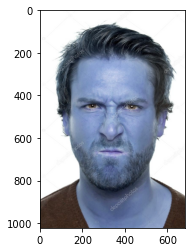

In [3]:
plt.imshow(img)

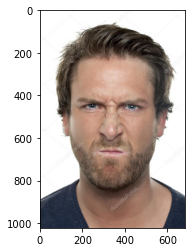

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.62s/it]


In [6]:
predictions

{'emotion': {'angry': 87.62256054609293,
  'disgust': 0.41145407346438484,
  'fear': 4.035387452198571,
  'happy': 0.03429076633023276,
  'sad': 5.831419353911953,
  'surprise': 0.10266129333465775,
  'neutral': 1.9622152194720246},
 'dominant_emotion': 'angry',
 'region': {'x': 89, 'y': 259, 'w': 499, 'h': 499},
 'age': 34,
 'gender': 'Man',
 'race': {'asian': 5.198212704726757e-06,
  'indian': 0.0011028771950805094,
  'black': 5.076992692920612e-06,
  'white': 97.05575108528137,
  'middle eastern': 2.291879616677761,
  'latino hispanic': 0.6512579042464495},
 'dominant_race': 'white'}

In [7]:
predictions["dominant_emotion"]

'angry'

## 2.) Sad

In [8]:
img = cv2.imread('emotion1.jpg')

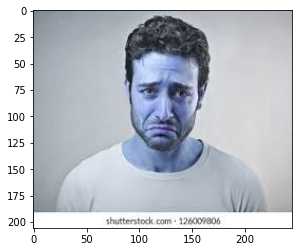

In [9]:
plt.imshow(img)

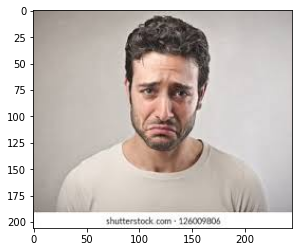

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.88s/it]


In [12]:
predictions

{'emotion': {'angry': 12.035033851861954,
  'disgust': 0.018713719327934086,
  'fear': 4.97039221227169,
  'happy': 0.0015753596017020755,
  'sad': 69.0812885761261,
  'surprise': 0.0029186514439061284,
  'neutral': 13.890080153942108},
 'dominant_emotion': 'sad',
 'region': {'x': 82, 'y': 45, 'w': 84, 'h': 84},
 'age': 24,
 'gender': 'Man',
 'race': {'asian': 0.06040719592210006,
  'indian': 5.334662164409418,
  'black': 0.06423218475814876,
  'white': 21.915275980863093,
  'middle eastern': 64.17533328239122,
  'latino hispanic': 8.450093382608102},
 'dominant_race': 'middle eastern'}

In [13]:
predictions["dominant_emotion"]

'sad'

## 3.) Happy

In [14]:
img = cv2.imread('emotion2.jpg')

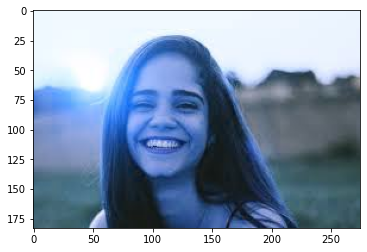

In [15]:
plt.imshow(img)

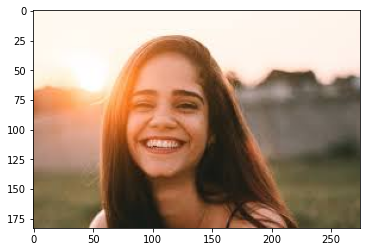

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


In [18]:
predictions

{'emotion': {'angry': 3.9431517961929785e-05,
  'disgust': 2.008509092377153e-06,
  'fear': 0.0050989703595405445,
  'happy': 99.39354062080383,
  'sad': 0.19795713014900684,
  'surprise': 5.935913236498891e-05,
  'neutral': 0.4033050499856472},
 'dominant_emotion': 'happy',
 'region': {'x': 67, 'y': 44, 'w': 89, 'h': 89},
 'age': 25,
 'gender': 'Woman',
 'race': {'asian': 3.2420147070867174,
  'indian': 9.500081449737376,
  'black': 1.8156693946517235,
  'white': 27.072429409929583,
  'middle eastern': 35.03229796501422,
  'latino hispanic': 23.33749999552965},
 'dominant_race': 'middle eastern'}

In [19]:
predictions["dominant_emotion"]

'happy'

## 4.) Surprise

In [20]:
img = cv2.imread('emotion3.jpg')

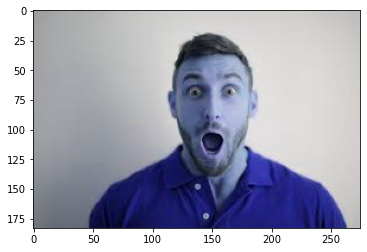

In [21]:
plt.imshow(img)

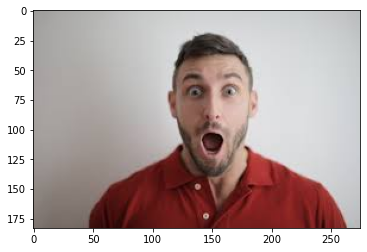

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [23]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.04s/it]


In [24]:
predictions

{'emotion': {'angry': 3.45727835249221e-08,
  'disgust': 2.987022087220464e-17,
  'fear': 0.001275944487133529,
  'happy': 1.0262380945036398e-07,
  'sad': 3.9716060301620004e-12,
  'surprise': 99.9987244606018,
  'neutral': 1.5868146489017102e-15},
 'dominant_emotion': 'surprise',
 'region': {'x': 110, 'y': 35, 'w': 84, 'h': 84},
 'age': 31,
 'gender': 'Man',
 'race': {'asian': 0.0002009897786191393,
  'indian': 0.001032805143611917,
  'black': 1.1579317101473633e-05,
  'white': 97.95647883934035,
  'middle eastern': 1.3217636671049993,
  'latino hispanic': 0.7205121291563357},
 'dominant_race': 'white'}

In [25]:
predictions["dominant_emotion"]

'surprise'

## 5.) Neutral

In [26]:
img = cv2.imread('emotion4.jpg')

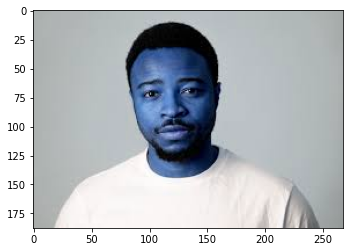

In [27]:
plt.imshow(img)

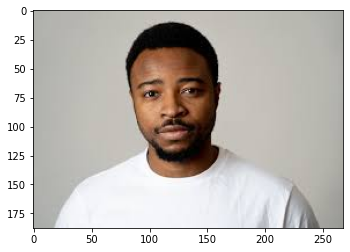

In [28]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.13it/s]


In [30]:
predictions

{'emotion': {'angry': 0.002136725688644633,
  'disgust': 5.497236327401542e-07,
  'fear': 0.8129497543245408,
  'happy': 1.110594320183654,
  'sad': 0.4584103630280711,
  'surprise': 0.009166243217549814,
  'neutral': 97.60674223940028},
 'dominant_emotion': 'neutral',
 'region': {'x': 79, 'y': 38, 'w': 84, 'h': 84},
 'age': 25,
 'gender': 'Man',
 'race': {'asian': 2.4345541014569497e-19,
  'indian': 9.225332951822614e-15,
  'black': 100.0,
  'white': 1.0989711250080917e-23,
  'middle eastern': 1.8886431702919212e-24,
  'latino hispanic': 8.301200815777961e-16},
 'dominant_race': 'black'}

In [31]:
predictions["dominant_emotion"]

'neutral'

## 6.) Fear

In [32]:
img = cv2.imread('emotion5.jpg')

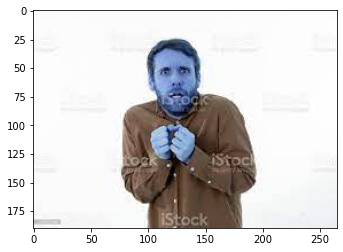

In [33]:
plt.imshow(img)

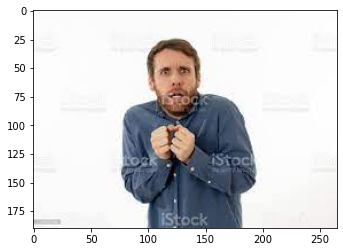

In [34]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [35]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.16s/it]


In [36]:
predictions

{'emotion': {'angry': 8.627842650156337,
  'disgust': 0.01026120930415093,
  'fear': 57.972193714641776,
  'happy': 13.949713283743058,
  'sad': 5.583056355483097,
  'surprise': 0.6232220025476221,
  'neutral': 13.233715383257316},
 'dominant_emotion': 'fear',
 'region': {'x': 98, 'y': 33, 'w': 52, 'h': 52},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 0.2229297999292612,
  'indian': 1.8683038651943207,
  'black': 0.06804899894632399,
  'white': 66.69684052467346,
  'middle eastern': 18.63064467906952,
  'latino hispanic': 12.513238191604614},
 'dominant_race': 'white'}

In [37]:
predictions["dominant_emotion"]

'fear'

In [38]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for(x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

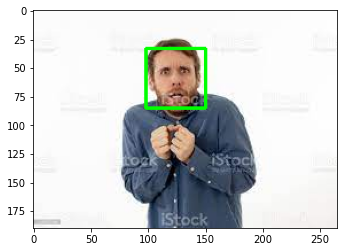

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [41]:
font = cv2.FONT_HERSHEY_SIMPLEX

# Using putText() method for putting text in video.

cv2.putText(img,
           predictions['dominant_emotion'],
           (0, 50),
           font, 2,
           (0, 0, 255),
            4,
           cv2.LINE_4);

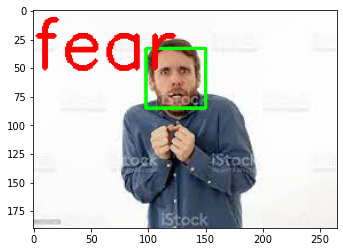

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Expression

In [43]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame,actions=['emotion'])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,result['dominant_emotion'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Orginal Video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Gender

In [44]:
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame,actions=['gender'])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,result['gender'],(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Orginal Video',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()